In [2]:
try:
  from truth_table import *
except ImportError:
  url = 'https://raw.githubusercontent.com/jhjeong314/Proofmood/main/logical_formulas'
  import httpimport
  with httpimport.remote_repo(url):
    from truth_table import *

input_str = '(B2(c,d+1) or Q) and forall x C1(x) imp forall x C1(x) and B2(c,d+1)'
node = parse_ast(input_str) # type: ignore
assert isinstance(node, Node) # type: ignore
fmla = Formula(node)        # type: ignore | Construct a formula from a node
fmla1 = Formula(input_str)  # type: ignore | Construct a formula from a string
assert isinstance(fmla1, Formula) # type: ignore
assert fmla1 == fmla        # Formula.__eq__()

print(fmla) # infix notation
print(fmla.ast) # polish notation

(B2(c, d + 1) or Q) and forall x C1(x) imp forall x C1(x) and B2(c, d + 1)
imp and or B2 c + d 1 Q forall x C1 x and forall x C1 x B2 c + d 1


<IPython.core.display.Math object>

(B2(c, d + 1) or Q) and forall x C1(x) imp forall x C1(x) and B2(c, d + 1)


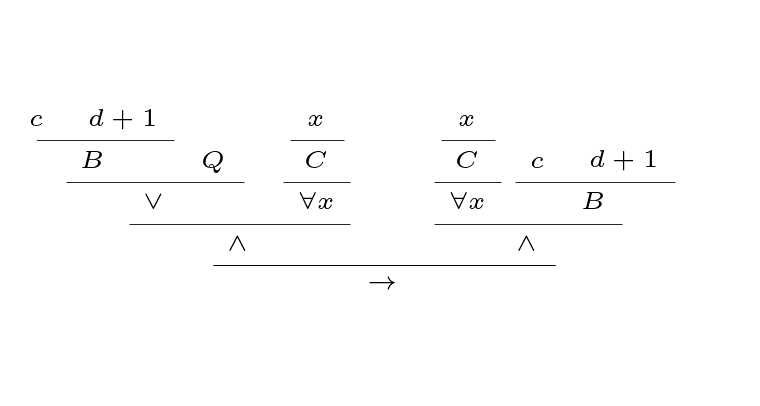

In [3]:
fmla.display_infix() # LaTeX
fmla.display_infix('text') # same as print(fmla)
fmla.ast.draw_tree() # Matplotlib tree diagram, terms are leaves (term nodes are not shown)

In [4]:
# Prime subformulas. These will be treated as propositional letters.
prime_subs = fmla.get_prime_subformulas()
prime_subs_li = list(prime_subs)
print(prime_subs_li)

['forall x C1(x)', 'B2(c, d + 1)', 'Q']


In [5]:
# Introduce a new formula, which
# shares some prime subformula with the previous formula.
input_str2 = 'forall x C1(x) imp (C2(y, z) iff Q)'
fmla2 = Formula(input_str2)
prime_subs = fmla2.get_prime_subformulas()
prime_subs_li = list(prime_subs)
print(prime_subs_li)

['forall x C1(x)', 'C2(y, z)', 'Q']


In [6]:
# We work on two formulas: fmla and fmla2.
# TruthTable object is created with a list of formulas.
truth_table = TruthTable([fmla, fmla2])
prime_subs_li = list(truth_table.get_prime_subformulas())
print(prime_subs_li)


['forall x C1(x)', 'B2(c, d + 1)', 'Q', 'C2(y, z)']


In [7]:
# TruthTable.label_prime_subs() assigns values to 2 properties, 
# node.id and node.alt_str to each propositional node.
# Propositional nodes consists of prime nodes and subformulas
# that are built from prop. nodes and connectives.

# The remaining two properties, node.bVal and node.level are
# assigned values by TruthTable.get_truth_tree().

truth_table.label_prime_subs(prime_subs_li) 
fmla.display_infix()
show_tree_nodes(fmla.ast)
fmla2.display_infix()
show_tree_nodes(fmla2.ast)

<IPython.core.display.Math object>

B2, id=1, bVal=-1, level=-1, alt_str=P_1
or, id=-1, bVal=-1, level=-1, alt_str=
Q, id=2, bVal=-1, level=-1, alt_str=Q
and, id=-1, bVal=-1, level=-1, alt_str=
forall, id=0, bVal=-1, level=-1, alt_str=P_2
imp, id=-1, bVal=-1, level=-1, alt_str=
forall, id=0, bVal=-1, level=-1, alt_str=P_2
and, id=-1, bVal=-1, level=-1, alt_str=
B2, id=1, bVal=-1, level=-1, alt_str=P_1


<IPython.core.display.Math object>

forall, id=0, bVal=-1, level=-1, alt_str=P_2
imp, id=-1, bVal=-1, level=-1, alt_str=
C2, id=3, bVal=-1, level=-1, alt_str=P_3
iff, id=-1, bVal=-1, level=-1, alt_str=
Q, id=2, bVal=-1, level=-1, alt_str=Q


In [8]:
# In fmla.display_infix(opt), opt ::= "latex" | "text" | "truth_table"

# If opt=="truth_table", then the prime subformulas are replaced with
# their alt_strs(alternate strings). This option should be used only
# after label_prime_subs(prime_subs_li) has been called.

fmla.display_infix()
fmla.display_infix("text")
fmla.display_infix('truth_table')

<IPython.core.display.Math object>

(B2(c, d + 1) or Q) and forall x C1(x) imp forall x C1(x) and B2(c, d + 1)
(P1 or Q) and P2 imp P2 and P1


In [9]:
fmla2.display_infix()
fmla2.display_infix("text")
fmla2.display_infix('truth_table')

<IPython.core.display.Math object>

forall x C1(x) imp (C2(y, z) iff Q)
P2 imp (P3 iff Q)


In [10]:
# Show the correspondence between the prime subformulas 
# and the alternative labels.

# formula case
fmla.show_p_sub_labels(prime_subs_li) 
print()
# truth table case
truth_table.show_p_sub_labels(prime_subs_li) 

P_1: B2(c, d + 1)
P_2: forall x C1(x)

P_1: B2(c, d + 1)
P_2: forall x C1(x)
P_3: C2(y, z)


In [11]:
# Start fresh.

# Initialize a truth table object.
fmla = Formula(input_str)
fmla2 = Formula(input_str2)
truth_table = TruthTable([fmla, fmla2])

# Build and display the truth table.
truth_table.show_truth_table()

Truth table for the following 2 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

prime subformulas = ['B2(c, d + 1)', 'forall x C1(x)', 'C2(y, z)', 'Q']
alt prop. letters = ['P_1', 'P_2', 'P_3', 'Q']

P1 P2 P3 Q : (P1 or Q) and P2 imp P2 and P1, P2 imp (P3 iff Q)
--------------------------------------------------------------
1  1  1  1    1  1  1   1  1   1  1   1  1   1   1   1   1  1
1  1  1  0    1  1  0   1  1   1  1   1  1   1   0   1   0  0
1  1  0  1    1  1  1   1  1   1  1   1  1   1   0   0   0  1
1  1  0  0    1  1  0   1  1   1  1   1  1   1   1   0   1  0
1  0  1  1    1  1  1   0  0   1  0   0  1   0   1   1   1  1
1  0  1  0    1  1  0   0  0   1  0   0  1   0   1   1   0  0
1  0  0  1    1  1  1   0  0   1  0   0  1   0   1   0   0  1
1  0  0  0    1  1  0   0  0   1  0   0  1   0   1   0   1  0
0  1  1  1    0  1  1   1  1   0  1   0  0   1   1   1   1  1
0  1  1  0    0  0  0   0  1   1  1   0  0   1   0   1   0  0
0  1  0  1    0  1  1   1  1   0  1   0  0   1   0   0   0  1
0  1  0  0    0  0  0   0  1   1  1   0  0   1   1   0   1  0
0  0  1  1

In [12]:
# Sorting the alternate labels for the prime subformulas.

prime_subs_li = list(truth_table.get_prime_subformulas())
alt_str_li = truth_table.label_prime_subs(prime_subs_li)
n_prime_node = len(prime_subs_li)
perm, perm_inv = truth_table.order(alt_str_li)
alt_str_li2 = permute_li(alt_str_li, perm) # == sorted(alt_str_li)
prime_subs_li2 = permute_li(prime_subs_li, perm)
print(perm)
print(perm_inv)
print(alt_str_li)
print(prime_subs_li)
print(alt_str_li2)
print(prime_subs_li2)

[1, 0, 3, 2]
[1, 0, 3, 2]
['P_2', 'P_1', 'Q', 'P_3']
['forall x C1(x)', 'B2(c, d + 1)', 'Q', 'C2(y, z)']
['P_1', 'P_2', 'P_3', 'Q']
['B2(c, d + 1)', 'forall x C1(x)', 'C2(y, z)', 'Q']


In [13]:
# We will compute the truth tree corresponding to the 
# 0110 row of the truth table above, for the 2nd formula only. 
# 10100 should be obtained.
tVal_li = permute_li(list('0110'), perm_inv)
print(tVal_li)

['1', '0', '0', '1']


In [14]:
tVal = ''.join(tVal_li)
truth_table.get_truth_tree(tVal)
print("You can read 10100 at bVal:\n")
show_tree_nodes(truth_table.f_list[1].ast)
print()
fmla2.display_infix("truth_table")
fmla2.display_infix("text")

You can read 10100 at bVal:

forall, id=0, bVal=1, level=0, alt_str=P_2
imp, id=-1, bVal=0, level=2, alt_str=
C2, id=3, bVal=1, level=0, alt_str=P_3
iff, id=-1, bVal=0, level=1, alt_str=
Q, id=2, bVal=0, level=0, alt_str=Q

P2 imp (P3 iff Q)
forall x C1(x) imp (C2(y, z) iff Q)


In [15]:
# Use Formula class method for a single formula.
fmla.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['B2(c, d + 1)', 'forall x C1(x)', 'Q']
alt prop. letters = ['P_1', 'P_2', 'Q']

P1 P2 Q : (P1 or Q) and P2 imp P2 and P1
----------------------------------------
1  1  1    1  1  1   1  1   1  1   1  1 
1  1  0    1  1  0   1  1   1  1   1  1 
1  0  1    1  1  1   0  0   1  0   0  1 
1  0  0    1  1  0   0  0   1  0   0  1 
0  1  1    0  1  1   1  1   0  1   0  0 
0  1  0    0  0  0   0  1   1  1   0  0 
0  0  1    0  1  1   0  0   1  0   0  0 
0  0  0    0  0  0   0  0   1  0   0  0 
----------------------------------------
Level      1  2  1   3  1   4  1   2  1 


In [16]:
fmla2.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['forall x C1(x)', 'C2(y, z)', 'Q']
alt prop. letters = ['P_1', 'P_2', 'Q']

P1 P2 Q : P1 imp (P2 iff Q)
---------------------------
1  1  1   1   1   1   1  1
1  1  0   1   0   1   0  0
1  0  1   1   0   0   0  1
1  0  0   1   1   0   1  0
0  1  1   0   1   1   1  1
0  1  0   0   1   1   0  0
0  0  1   0   1   0   0  1
0  0  0   0   1   0   1  0
---------------------------
Level     1   3   1   2  1


In [17]:
fmla_and = Formula("A and B")
fmla_or = Formula("A or B")
fmla_imp = Formula("A imp B")
fmla_imp2 = Formula("not A or B")
fmla_iff = Formula("A iff B")
fmla_xor = Formula("A xor B")
f_list = [fmla_and, fmla_or, fmla_imp, fmla_imp2, fmla_iff, fmla_xor]
TruthTable(f_list).show_truth_table()


Truth table for the following 6 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

prime subformulas = ['A', 'B']
alt prop. letters = ['A', 'B']

A B : A and B, A or B, A imp B, not A or B, A iff B, A xor B
------------------------------------------------------------
1 1   1  1  1  1 1  1  1  1  1   0  1 1  1  1  1  1  1  0  1
1 0   1  0  0  1 1  0  1  0  0   0  1 0  0  1  0  0  1  1  0
0 1   0  0  1  0 1  1  0  1  1   1  0 1  1  0  0  1  0  1  1
0 0   0  0  0  0 0  0  0  1  0   1  0 1  0  0  1  0  0  0  0
------------------------------------------------------------
Level 1  2  1  1 2  1  1  2  1   2  1 3  1  1  2  1  1  2  1


In [18]:
fmla_not = Formula("not A")
f_list = [fmla_not, fmla_and, fmla_or, fmla_imp, fmla_iff]
# Generate and print the latex source code for the truth table.
TruthTable(f_list).show_truth_table('latex') 

Truth table for the following 5 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Prime subformulas and their alternate labels.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

\begin{tabular}{|c|c||c|c||c|c|c||c|c|c||c|c|c||c|c|c|}\hline
$A$ & $B$ & $\neg$ & $A$ & $A$ & $\wedge$ & $B$ & $A$
 & $\vee$ & $B$ & $A$ & $\to$ & $B$ & $A$ & $\leftrightarrow$ & $B$
 \\ \hline
1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 \\ \hline
\multicolumn{2}{|c||}{Level}
    & 2 & 1 & 1 & 2 & 1 & 1 & 2 & 1 & 1 & 2 & 1 & 1 & 2 & 1 \\ \hline
\end{tabular}


In [19]:
fmla_and = Formula("A and B")
fmla_or = Formula("B or C")
fmla_imp = Formula("D imp C")
fmla_imp2 = Formula("not C or D")
fmla_iff = Formula("A iff C")
fmla_xor = Formula("A xor C")
f_list = [fmla_and, fmla_or, fmla_imp, fmla_imp2, fmla_iff, fmla_xor]
TruthTable(f_list).show_truth_table()


Truth table for the following 6 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

prime subformulas = ['A', 'B', 'C', 'D']
alt prop. letters = ['A', 'B', 'C', 'D']

A B C D : A and B, B or C, D imp C, not C or D, A iff C, A xor C
----------------------------------------------------------------
1 1 1 1   1  1  1  1 1  1  1  1  1   0  1 1  1  1  1  1  1  0  1
1 1 1 0   1  1  1  1 1  1  0  1  1   0  1 0  0  1  1  1  1  0  1
1 1 0 1   1  1  1  1 1  0  1  0  0   1  0 1  1  1  0  0  1  1  0
1 1 0 0   1  1  1  1 1  0  0  1  0   1  0 1  0  1  0  0  1  1  0
1 0 1 1   1  0  0  0 1  1  1  1  1   0  1 1  1  1  1  1  1  0  1
1 0 1 0   1  0  0  0 1  1  0  1  1   0  1 0  0  1  1  1  1  0  1
1 0 0 1   1  0  0  0 0  0  1  0  0   1  0 1  1  1  0  0  1  1  0
1 0 0 0   1  0  0  0 0  0  0  1  0   1  0 1  0  1  0  0  1  1  0
0 1 1 1   0  0  1  1 1  1  1  1  1   0  1 1  1  0  0  1  0  1  1
0 1 1 0   0  0  1  1 1  1  0  1  1   0  1 0  0  0  0  1  0  1  1
0 1 0 1   0  0  1  1 1  0  1  0  0   1  0 1  1  0  1  0  0  0  0
0 1 0 0   0  0  1  1 1  0  0  1  0   1  0 1  0  0  1  0  0  0  0
0 0 1 1

In [20]:
from truth_table import *

f1 = Formula("forall y A1(y) imp Q2(a,b)")
f2 = Formula("Q2(a,b) or C")
f3 = Formula("not (C imp Q2(a,b)) or forall y A1(y)")
F_List = TruthTable([f1, f2, f3])
F_List.show_truth_table()

Truth table for the following 3 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

prime subformulas = ['C', 'forall y A1(y)', 'Q2(a, b)']
alt prop. letters = ['C', 'P_1', 'P_2']

C P1 P2 : P1 imp P2, P2 or C, not (C imp P2) or P1
--------------------------------------------------
1 1  1    1   1  1   1  1  1   0   1  1  1   1  1 
1 1  0    1   0  0   0  1  1   1   1  0  0   1  1 
1 0  1    0   1  1   1  1  1   0   1  1  1   0  0 
1 0  0    0   1  0   0  1  1   1   1  0  0   1  0 
0 1  1    1   1  1   1  1  0   0   0  1  1   1  1 
0 1  0    1   0  0   0  0  0   0   0  1  0   1  1 
0 0  1    0   1  1   1  1  0   0   0  1  1   0  0 
0 0  0    0   1  0   0  0  0   0   0  1  0   0  0 
--------------------------------------------------
Level     1   2  1   1  2  1   3   1  2  1   4  1 


In [21]:
F_List.show_truth_table('latex')

Truth table for the following 3 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Prime subformulas and their alternate labels.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

\begin{tabular}{|c|c|c||c|c|c||c|c|c||c|c|c|c|c|c|c|c|}\hline
$C$ & $P_1$ & $P_2$ & $P_1$ & $\to$ & $P_2$ & $P_2$ & $\vee$
 & $C$ & $\neg$ & $($ & $C$ & $\to$ & $P_2$ & $)$ & $\vee$
 & $P_1$ \\ \hline
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 &  & 1 & 1 & 1 &  & 1 & 1 \\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 &  & 1 & 0 & 0 &  & 1 & 1 \\
1 & 0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 0 &  & 1 & 1 & 1 &  & 0 & 0 \\
1 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 1 & 1 &  & 1 & 0 & 0 &  & 1 & 0 \\
0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 0 & 0 &  & 0 & 1 & 1 &  & 1 & 1 \\
0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 &  & 0 & 1 & 0 &  & 1 & 1 \\
0 & 0 & 1 & 0 & 1 & 1 & 1 & 1 & 0 & 0 &  & 0 & 1 & 1 &  & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 &  & 0 & 1 & 0 &  & 0 & 0 \\ \hline
\multicolumn{3}{|c||}{Level}
    & 1 & 2 & 1 & 1 & 2 & 1 & 3 &  & 1 & 2 & 1 &  & 4 & 1 \\ \hline
\end{tabular}


In [22]:
f1 = Formula('A imp forall x B1(x)')
f2 = Formula('forall x B1(x) or D2(f(a), b+1)')
f3 = Formula('(D2(f(a), b+1) imp not forall x B1(x)) imp D2(f(a), b+1)')
t_table = TruthTable([f1, f2, f3])
t_table.show_truth_table()

Truth table for the following 3 formulas.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

prime subformulas = ['A', 'forall x B1(x)', 'D2(f(a), b + 1)']
alt prop. letters = ['A', 'P_1', 'P_2']

A P1 P2 : A imp P1, P1 or P2, (P2 imp not P1) imp P2
----------------------------------------------------
1 1  1    1  1  1   1  1  1    1   0   0  1    1  1 
1 1  0    1  1  1   1  1  0    0   1   0  1    0  0 
1 0  1    1  0  0   0  1  1    1   1   1  0    1  1 
1 0  0    1  0  0   0  0  0    0   1   1  0    0  0 
0 1  1    0  1  1   1  1  1    1   0   0  1    1  1 
0 1  0    0  1  1   1  1  0    0   1   0  1    0  0 
0 0  1    0  1  0   0  1  1    1   1   1  0    1  1 
0 0  0    0  1  0   0  0  0    0   1   1  0    0  0 
----------------------------------------------------
Level     1  2  1   1  2  1    1   3   2  1    4  1 


In [23]:
fmla = Formula('(A imp B) and (not A imp C) iff (A and B) or (not A and C)')
t_table = TruthTable([fmla])
t_table.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['A', 'B', 'C']
alt prop. letters = ['A', 'B', 'C']

A B C : (A imp B) and (not A imp C) iff (A and B) or (not A and C)
------------------------------------------------------------------
1 1 1    1  1  1   1    0  1  1  1   1   1  1  1  1    0  1  0  1
1 1 0    1  1  1   1    0  1  1  0   1   1  1  1  1    0  1  0  0
1 0 1    1  0  0   0    0  1  1  1   1   1  0  0  0    0  1  0  1
1 0 0    1  0  0   0    0  1  1  0   1   1  0  0  0    0  1  0  0
0 1 1    0  1  1   1    1  0  1  1   1   0  0  1  1    1  0  1  1
0 1 0    0  1  1   0    1  0  0  0   1   0  0  1  0    1  0  0  0
0 0 1    0  1  0   1    1  0  1  1   1   0  0  0  1    1  0  1  1
0 0 0    0  1  0   0    1  0  0  0   1   0  0  0  0    1  0  0  0
------------------------------------------------------------------
Level    1  2  1   4    2  1  3  1   5   1  2  1  4    2  1  3  1


In [24]:
f1 = "(A and not B) or (not A and B) iff not(A iff B)"
f2 = "(A and B) or (not A and not B) iff (A iff B)"
f3 = "(A imp not B) and (A or B) iff not(A iff B)"
fmla = Formula(f1)
t_table = TruthTable([fmla])
t_table.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['A', 'B']
alt prop. letters = ['A', 'B']

A B : (A and not B) or (not A and B) iff not (A iff B)
------------------------------------------------------
1 1    1  0   0  1  0    0  1  0  1   1   0   1  1  1
1 0    1  1   1  0  1    0  1  0  0   1   1   1  0  0
0 1    0  0   0  1  1    1  0  1  1   1   1   0  0  1
0 0    0  0   1  0  0    1  0  0  0   1   0   0  1  0
------------------------------------------------------
Level  1  3   2  1  4    2  1  3  1   5   3   1  2  1


In [25]:
fmla = Formula(f2)
t_table = TruthTable([fmla])
t_table.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['A', 'B']
alt prop. letters = ['A', 'B']

A B : (A and B) or (not A and not B) iff A iff B
------------------------------------------------
1 1    1  1  1  1    0  1  0   0  1   1  1  1  1
1 0    1  0  0  0    0  1  0   1  0   1  1  0  0
0 1    0  0  1  0    1  0  0   0  1   1  0  0  1
0 0    0  0  0  1    1  0  1   1  0   1  0  1  0
------------------------------------------------
Level  1  2  1  4    2  1  3   2  1   5  1  2  1


In [28]:
fmla = Formula("(A and not B) or (not A and B) iff not(A iff B)")
t_table = TruthTable([fmla])
t_table.show_truth_table()

Truth table for the following formula.


<IPython.core.display.Math object>

prime subformulas = ['A', 'B']
alt prop. letters = ['A', 'B']

A B : (A and not B) or (not A and B) iff not (A iff B)
------------------------------------------------------
1 1    1  0   0  1  0    0  1  0  1   1   0   1  1  1
1 0    1  1   1  0  1    0  1  0  0   1   1   1  0  0
0 1    0  0   0  1  1    1  0  1  1   1   1   0  0  1
0 0    0  0   1  0  0    1  0  0  0   1   0   0  1  0
------------------------------------------------------
Level  1  3   2  1  4    2  1  3  1   5   3   1  2  1
